# Cleaning and investigating the data

* Import the necessary libraries

In [1]:
import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')

import pickle

from sklearn import metrics
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
import statsmodels.api as sm
from statsmodels.formula.api import ols

from functions import *

* Import the data

In [2]:
df = pd.read_csv('data/online_news_popularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


* Check out column names

In [3]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

* Remove spaces and shorten/clarify some column names

In [4]:
k = list(df.columns)
v = [column.strip() for column in df.columns]

In [5]:
renamer = dict(zip(k, v))
new_names = {'num_hrefs': 'num_links',
             'num_self_hrefs': 'num_self_links',
             'n_unique_tokens': 'rate_unique_tokens',
             'n_non_stop_words': 'rate_non_stop_words',
             'n_non_stop_unique_tokens': 'rate_non_stop_unique_tokens',
             'data_channel_is_lifestyle': 'lifestyle',
             'data_channel_is_entertainment': 'entertainment',
             'data_channel_is_bus': 'business',
             'data_channel_is_socmed': 'social_media',
             'data_channel_is_tech': 'tech',
             'data_channel_is_world': 'world',
             'self_reference_min_shares': 'self_ref_min_shares',
             'self_reference_max_shares': 'self_ref_max_shares',
             'self_reference_avg_sharess': 'self_ref_avg_shares',
             'weekday_is_monday': 'monday',
             'weekday_is_tuesday': 'tuesday',
             'weekday_is_wednesday': 'wednesday',
             'weekday_is_thursday': 'thursday',
             'weekday_is_friday': 'friday',
             'weekday_is_saturday': 'saturday',
             'weekday_is_sunday': 'sunday',
                }

In [6]:
df.rename(columns=renamer, inplace=True)
df.rename(columns=new_names, inplace=True)

In [7]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'rate_unique_tokens', 'rate_non_stop_words',
       'rate_non_stop_unique_tokens', 'num_links', 'num_self_links',
       'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
       'lifestyle', 'entertainment', 'business', 'social_media', 'tech',
       'world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_ref_min_shares', 'self_ref_max_shares', 'self_ref_avg_shares',
       'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polar

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   url                           39644 non-null  object 
 1   timedelta                     39644 non-null  float64
 2   n_tokens_title                39644 non-null  float64
 3   n_tokens_content              39644 non-null  float64
 4   rate_unique_tokens            39644 non-null  float64
 5   rate_non_stop_words           39644 non-null  float64
 6   rate_non_stop_unique_tokens   39644 non-null  float64
 7   num_links                     39644 non-null  float64
 8   num_self_links                39644 non-null  float64
 9   num_imgs                      39644 non-null  float64
 10  num_videos                    39644 non-null  float64
 11  average_token_length          39644 non-null  float64
 12  num_keywords                  39644 non-null  float64
 13  l

In [9]:
to_int = ['num_links', 'num_self_links', 'num_imgs', 'num_videos', 'num_keywords', 'lifestyle', 'entertainment',
          'business', 'social_media', 'tech', 'world', 'self_ref_min_shares', 'self_ref_max_shares', 
          'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'is_weekend',
          ]
df[to_int] = df[to_int].astype('int64')

* Take a look at the target variable.

In [10]:
df.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d392630>]],
      dtype=object)

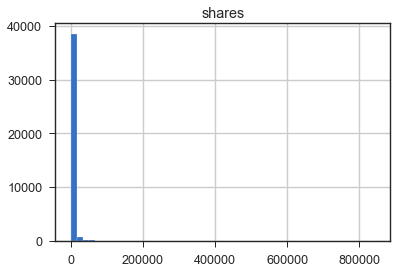

In [11]:
df.hist('shares',bins=50)

* See if the log of 'shares' normalizes it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1296e6710>]],
      dtype=object)

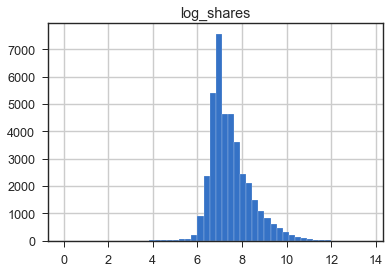

In [12]:
df['log_shares'] = df.shares.apply(lambda x: np.log(x))
df.hist('log_shares', bins=50)

* Data seems pretty clean, so we'll take a preliminary look at some numbers.

In [13]:
untouched_features = list(df.columns)
untouched_features.remove('shares')
untouched_features.remove('log_shares')
untouched_features.remove('url')
untouched_features.remove('monday')
untouched_features.remove('lifestyle')
untouched_features.remove('LDA_00')
# untouched_features.remove('timedelta')

col_list = '+'.join(untouched_features)
f = 'log_shares~' + col_list
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     104.4
Date:                Thu, 07 May 2020   Prob (F-statistic):               0.00
Time:                        12:42:06   Log-Likelihood:                -50711.
No. Observations:               39644   AIC:                         1.015e+05
Df Residuals:                   39588   BIC:                         1.020e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        6.7672      0.068     99.461      0.000       6.634       6.901
timedelta                     6.713e-05   2.97e-05      2.264      0.024    9.01e-06       0.000
n_tokens_title                   0.0083      0.002      3.777      0.000       0.004       0.013
n_tokens_content              4.052e-05   1.69e-05      2.396      0.017    7.37e-06    7.37e-05
rate_unique_tokens               0.2043      0.145      1.412      0.158      -0.079       0.488
rate_non_stop_words              0.0378      0.049      0.768      0.442      -0.059       0.134
rate_non_stop_unique_tokens     -0.2785      0.122     -2.274      0.023      -0.518      -0.039
num_links                        0.0042      0.001      8.247      0.000       0.003       0.005
num_self_links                  -0.0077      0.001     -5.724      0.000      -0.010      -0.005
num_imgs                         0.0025      0.001      3.626      0.000       0.001       0.004
num_videos                       0.0019      0.001      1.606      0.108      -0.000       0.004
average_token_length            -0.0910      0.018     -5.043      0.000      -0.126      -0.056
num_keywords                     0.0121      0.003      4.313      0.000       0.007       0.018
entertainment                   -0.1559      0.018     -8.607      0.000      -0.191      -0.120
business                        -0.1117      0.024     -4.596      0.000      -0.159      -0.064
social_media                     0.2098      0.024      8.630      0.000       0.162       0.257
tech                             0.1695      0.020      8.355      0.000       0.130       0.209
world                            0.0132      0.024      0.544      0.586      -0.034       0.061
kw_min_min                       0.0009      0.000      7.262      0.000       0.001       0.001
kw_max_min                    1.713e-05   3.81e-06      4.496      0.000    9.66e-06    2.46e-05
kw_avg_min                      -0.0001   2.34e-05     -5.465      0.000      -0.000   -8.21e-05
kw_min_max                   -3.726e-07   8.89e-08     -4.189      0.000   -5.47e-07   -1.98e-07
kw_max_max                    4.518e-08   4.46e-08      1.013      0.311   -4.23e-08    1.33e-07
kw_avg_max                   -2.577e-07   6.36e-08     -4.051      0.000   -3.82e-07   -1.33e-07
kw_min_avg                   -5.083e-05   5.72e-06     -8.879      0.000    -6.2e-05   -3.96e-05
kw_max_avg                   -4.212e-05   1.91e-06    -22.007      0.000   -4.59e-05   -3.84e-05
kw_avg_avg                       0.0003   1.09e-05     30.915      0.000       0.000       0.000
self_ref_min_shares           7.359e-07   5.69e-07      1.292      0.196    -3.8e-07    1.85e-06
self_ref_max_shares          -8.753e-09   3.09e-07     -0.028      0.977   -

* R<sup>2</sup> value is very low (0.127), so let's see if we can bring it up a bit.
* A closer looks at some of the columns shows some suspicious values of 0 and 1 for the rate of certain tokens and token types. Also some values are below 1 for columns that measure in article shares, even though the minimum value for shares is 1.
    * Reassign those 0s and 1s to each column's median value.
    * Reassign any less-than 1s in columns measuring in shares to 1.

In [14]:
df.kw_min_min.describe()

count    39644.000000
mean        26.106801
std         69.633215
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          4.000000
max        377.000000
Name: kw_min_min, dtype: float64

In [15]:
less_set_to_one_cols = ['kw_avg_min', 'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
                        'kw_avg_avg', 'self_ref_avg_shares', 'n_tokens_content']

great_set_to_one_cols = ['rate_unique_tokens', 'rate_non_stop_unique_tokens']

zero_to_median_cols = ['average_token_length', 'n_tokens_content', 'rate_unique_tokens', 'global_subjectivity',
                       'global_rate_positive_words', 'rate_positive_words', 'rate_negative_words', 
                       'avg_positive_polarity', 'avg_negative_polarity']

one_to_median_cols = ['rate_non_stop_unique_tokens', 'rate_positive_words', 'rate_negative_words', 
                      'avg_positive_polarity']

shares_cols = ['kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
               'self_ref_min_shares', 'self_ref_max_shares', 'self_ref_avg_shares']

In [16]:
for column in less_set_to_one_cols:
    less_set_to_one(df, column)
    
for column in great_set_to_one_cols:
    great_set_to_one(df, column)
    
for column in zero_to_median_cols:
    zero_to_median(df, column)
    
for column in one_to_median_cols:
    one_to_median(df, column)
    
neg_one_to_median(df, 'avg_negative_polarity')

for column in less_set_to_one_cols:
    log_col(df, column)

In [17]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'rate_unique_tokens',
       'rate_non_stop_words', 'rate_non_stop_unique_tokens', 'num_links',
       'num_self_links', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'lifestyle', 'entertainment', 'business',
       'social_media', 'tech', 'world', 'kw_min_min', 'kw_max_min',
       'kw_max_max', 'self_ref_min_shares', 'self_ref_max_shares', 'monday',
       'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday',
       'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivi

In [18]:
cleaner_features = list(df.columns)
cleaner_features.remove('shares')
cleaner_features.remove('log_shares')
cleaner_features.remove('url')
cleaner_features.remove('monday')
cleaner_features.remove('lifestyle')
cleaner_features.remove('LDA_00')
# untouched_features.remove('timedelta')

col_list = '+'.join(cleaner_features)
f = 'log_shares~' + col_list
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     101.6
Date:                Thu, 07 May 2020   Prob (F-statistic):               0.00
Time:                        12:42:06   Log-Likelihood:                -50824.
No. Observations:               39644   AIC:                         1.018e+05
Df Residuals:                   39589   BIC:                         1.022e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.5553      3.127      1.457      0.145      -1.573      10.684
timedelta                     2.956e-05   2.99e-05      0.990      0.322    -2.9e-05    8.81e-05
n_tokens_title                   0.0076      0.002      3.419      0.001       0.003       0.012
rate_unique_tokens              -0.2835      0.201     -1.411      0.158      -0.677       0.110
rate_non_stop_words              0.0015      0.001      1.736      0.083      -0.000       0.003
rate_non_stop_unique_tokens     -0.0180      0.129     -0.139      0.889      -0.271       0.235
num_links                        0.0055      0.001     10.597      0.000       0.004       0.006
num_self_links                  -0.0138      0.001     -9.927      0.000      -0.017      -0.011
num_imgs                         0.0027      0.001      4.065      0.000       0.001       0.004
num_videos                       0.0030      0.001      2.492      0.013       0.001       0.005
average_token_length            -0.0580      0.019     -3.117      0.002      -0.094      -0.022
num_keywords                    -0.0012      0.003     -0.402      0.688      -0.007       0.005
entertainment                   -0.2874      0.017    -16.686      0.000      -0.321      -0.254
business                        -0.1237      0.024     -5.071      0.000      -0.172      -0.076
social_media                     0.1198      0.024      4.966      0.000       0.073       0.167
tech                             0.1236      0.020      6.104      0.000       0.084       0.163
world                           -0.0780      0.024     -3.241      0.001      -0.125      -0.031
kw_min_min                       0.0005      0.000      4.198      0.000       0.000       0.001
kw_max_min                   -3.887e-06   1.26e-06     -3.079      0.002   -6.36e-06   -1.41e-06
kw_max_max                    6.767e-07   6.14e-08     11.022      0.000    5.56e-07    7.97e-07
self_ref_min_shares           1.116e-06   2.58e-07      4.323      0.000     6.1e-07    1.62e-06
self_ref_max_shares           4.143e-07   1.26e-07      3.289      0.001    1.67e-07    6.61e-07
tuesday                         -0.0750      0.015     -5.067      0.000      -0.104      -0.046
wednesday                       -0.0743      0.015     -5.029      0.000      -0.103      -0.045
thursday                        -0.0655      0.015     -4.406      0.000      -0.095      -0.036
friday                           0.0002      0.016      0.015      0.988      -0.031       0.031
saturday                         0.0748      0.014      5.529      0.000       0.048       0.101
sunday                           0.0684      0.013      5.214      0.000       0.043       0.094
is_weekend                       0.1432      0.011     13.135      0.000    

* A slightly higher F-statistic and adjusted R<sup>2</sup>, but no movement on the actual R<sup>2</sup>.
* Let's try categorizing the image and video columns, since the number itself doesn't seem to hold much value.

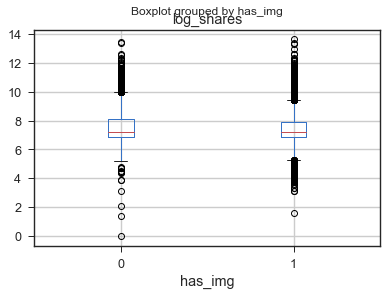

In [19]:
df['has_img'] = np.where(df.num_imgs > 0, 1, 0)
df.boxplot('log_shares', 'has_img')

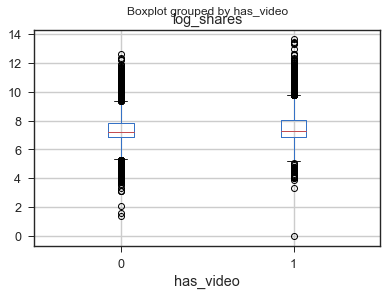

In [20]:
df['has_video'] = np.where(df.num_videos > 0, 1, 0)
df.boxplot('log_shares', 'has_video')

* Drop unnecessary data, suspicious data, and at least one dummy variable from each category.
    * 'rate_non_stop_words' (the rate of non-stop words in the content) only has values of 0 and 1, though values should seemingly be spread out between 0 and 1.

In [21]:
features = df.drop(columns=['url', 'timedelta', 'shares', 'num_imgs', 'num_videos',
                            'rate_non_stop_words', 'kw_max_max', 'kw_min_min', 'self_ref_min_shares',
                            'self_ref_max_shares',
                            'monday', 'lifestyle',  ])

In [22]:
features.columns

Index(['n_tokens_title', 'rate_unique_tokens', 'rate_non_stop_unique_tokens',
       'num_links', 'num_self_links', 'average_token_length', 'num_keywords',
       'entertainment', 'business', 'social_media', 'tech', 'world',
       'kw_max_min', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'log_shares', 'log_kw_avg_min',
       'log_kw_min_max', 'log_kw_avg_max', 'log_kw_min_avg', 'log_kw_max_avg',
       'log_kw_avg_avg', 'log_se

In [23]:
f_list = list(features.columns)
f_list.remove('log_shares')

col_list = '+'.join(f_list)
f = 'log_shares~' + col_list
model = ols(formula=f, data=features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     110.2
Date:                Thu, 07 May 2020   Prob (F-statistic):               0.00
Time:                        12:42:07   Log-Likelihood:                -50861.
No. Observations:               39644   AIC:                         1.018e+05
Df Residuals:                   39594   BIC:                         1.023e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        5.4368      3.215      1.691      0.091      -0.865      11.739
n_tokens_title                   0.0052      0.002      2.407      0.016       0.001       0.010
rate_unique_tokens              -0.3352      0.194     -1.725      0.084      -0.716       0.046
rate_non_stop_unique_tokens     -0.1048      0.122     -0.860      0.390      -0.344       0.134
num_links                        0.0064      0.001     12.367      0.000       0.005       0.007
num_self_links                  -0.0150      0.001    -10.864      0.000      -0.018      -0.012
average_token_length            -0.0314      0.019     -1.681      0.093      -0.068       0.005
num_keywords                     0.0073      0.003      2.598      0.009       0.002       0.013
entertainment                   -0.2928      0.017    -17.002      0.000      -0.327      -0.259
business                        -0.1597      0.024     -6.612      0.000      -0.207      -0.112
social_media                     0.1367      0.024      5.672      0.000       0.089       0.184
tech                             0.1091      0.020      5.390      0.000       0.069       0.149
world                           -0.0915      0.024     -3.812      0.000      -0.139      -0.044
kw_max_min                   -2.543e-06   1.25e-06     -2.037      0.042   -4.99e-06   -9.55e-08
tuesday                         -0.0793      0.015     -5.352      0.000      -0.108      -0.050
wednesday                       -0.0794      0.015     -5.372      0.000      -0.108      -0.050
thursday                        -0.0685      0.015     -4.604      0.000      -0.098      -0.039
friday                          -0.0022      0.016     -0.141      0.888      -0.033       0.029
saturday                         0.0763      0.014      5.636      0.000       0.050       0.103
sunday                           0.0712      0.013      5.423      0.000       0.045       0.097
is_weekend                       0.1475      0.011     13.516      0.000       0.126       0.169
LDA_00                          -1.6726      0.882     -1.896      0.058      -3.402       0.057
LDA_01                          -1.9308      0.882     -2.190      0.029      -3.659      -0.203
LDA_02                          -2.1397      0.882     -2.426      0.015      -3.869      -0.411
LDA_03                          -1.8646      0.881     -2.115      0.034      -3.592      -0.137
LDA_04                          -1.9549      0.882     -2.216      0.027      -3.684      -0.226
global_subjectivity              0.5084      0.063      8.074      0.000       0.385       0.632
global_sentiment_polarity       -0.2710      0.115     -2.354      0.019      -0.497      -0.045
global_rate_positive_words      -0.8315      0.549     -1.515      0.130    

* Let's try removing some very high P-values.

In [24]:
extreme_cols = find_extremes(features)
extreme_cols.remove('log_shares')
features[extreme_cols].describe()

,n_tokens_title,rate_unique_tokens,rate_unique_tokens,rate_non_stop_unique_tokens,num_links,num_self_links,average_token_length,social_media,kw_max_min,global_subjectivity,...,title_sentiment_polarity,log_shares,log_kw_avg_min,log_kw_avg_min,log_kw_avg_max,log_kw_max_avg,log_kw_max_avg,log_kw_avg_avg,log_kw_avg_avg,log_n_tokens_content
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,0.546622,0.546622,0.672797,10.883690,3.293638,4.687183,0.058597,1153.951682,0.456913,...,0.071425,7.474855,5.285117,5.285117,12.241858,8.482530,8.482530,7.975971,7.975971,5.887062
std,2.114037,0.100812,0.100812,0.154033,11.332017,3.855141,0.279009,0.234871,3857.990877,0.086970,...,0.265450,0.930486,1.159682,1.159682,0.943071,0.582098,0.582098,0.489534,0.489534,1.256215
min,2.000000,0.114964,0.114964,0.000000,0.000000,0.000000,3.600000,0.000000,0.000000,0.022222,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.479532,0.479532,0.625739,4.000000,1.000000,4.502244,0.000000,445.000000,0.404489,...,0.000000,6.852243,4.954065,4.954065,12.060161,8.178106,8.178106,7.775884,7.775884,5.505332
50%,10.000000,0.539230,0.539230,0.690476,8.000000,3.000000,4.664084,0.000000,660.000000,0.453458,...,0.000000,7.244228,5.461711,5.461711,12.407266,8.379238,8.379238,7.962093,7.962093,6.013715
75%,12.000000,0.608696,0.608696,0.754620,14.000000,4.000000,4.854839,0.000000,1000.000000,0.508333,...,0.150000,7.937375,5.877736,5.877736,12.709813,8.702835,8.702835,8.188753,8.188753,6.573680
max,23.000000,1.000000,1.000000,1.000000,304.000000,116.000000,8.041534,1.000000,298400.000000,1.000000,...,1.000000,13.645078,10.664944,10.664944,13.645078,12.606190,12.606190,10.682070,10.682070,9.044758


In [25]:
rein_extremes(features, extreme_cols)
features.describe()

,n_tokens_title,rate_unique_tokens,rate_non_stop_unique_tokens,num_links,num_self_links,average_token_length,num_keywords,entertainment,business,social_media,...,log_kw_avg_min,log_kw_min_max,log_kw_avg_max,log_kw_min_avg,log_kw_max_avg,log_kw_avg_avg,log_self_ref_avg_shares,log_n_tokens_content,has_img,has_video
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398565,0.546615,0.674485,10.671710,3.193118,4.686590,7.223767,0.178009,0.157855,0.058484,...,5.308137,5.045032,12.259005,4.258814,8.491980,7.988524,6.667274,5.912747,0.823756,0.368732
std,2.113181,0.100764,0.146791,9.909757,3.137274,0.275593,1.909130,0.382525,0.364610,0.234420,...,1.058561,4.520923,0.785279,3.726459,0.428693,0.337462,3.280200,1.138918,0.381032,0.482467
min,2.000000,0.143560,0.056664,0.000000,0.000000,3.600000,1.000000,0.000000,0.000000,0.000000,...,0.943081,0.000000,8.469573,0.000000,6.711233,6.603144,0.000000,0.862203,0.000000,0.000000
25%,9.000000,0.479532,0.625739,4.000000,1.000000,4.502244,6.000000,0.000000,0.000000,0.000000,...,4.954065,0.000000,12.060161,0.000000,8.178106,7.775884,6.888764,5.505332,1.000000,0.000000
50%,10.000000,0.539230,0.690476,8.000000,3.000000,4.664084,7.000000,0.000000,0.000000,0.000000,...,5.461711,7.244228,12.407266,6.931116,8.379238,7.962093,7.696213,6.013715,1.000000,0.000000
75%,12.000000,0.608696,0.754620,14.000000,4.000000,4.854839,9.000000,0.000000,0.000000,0.000000,...,5.877736,8.974618,12.709813,7.628897,8.702835,8.188753,8.556414,6.573680,1.000000,1.000000
max,18.854896,0.949671,1.000000,56.211759,18.714203,5.803220,10.000000,1.000000,1.000000,0.998080,...,9.658672,13.645078,13.645078,8.192305,10.275553,9.372541,13.645078,9.044758,1.000000,1.000000


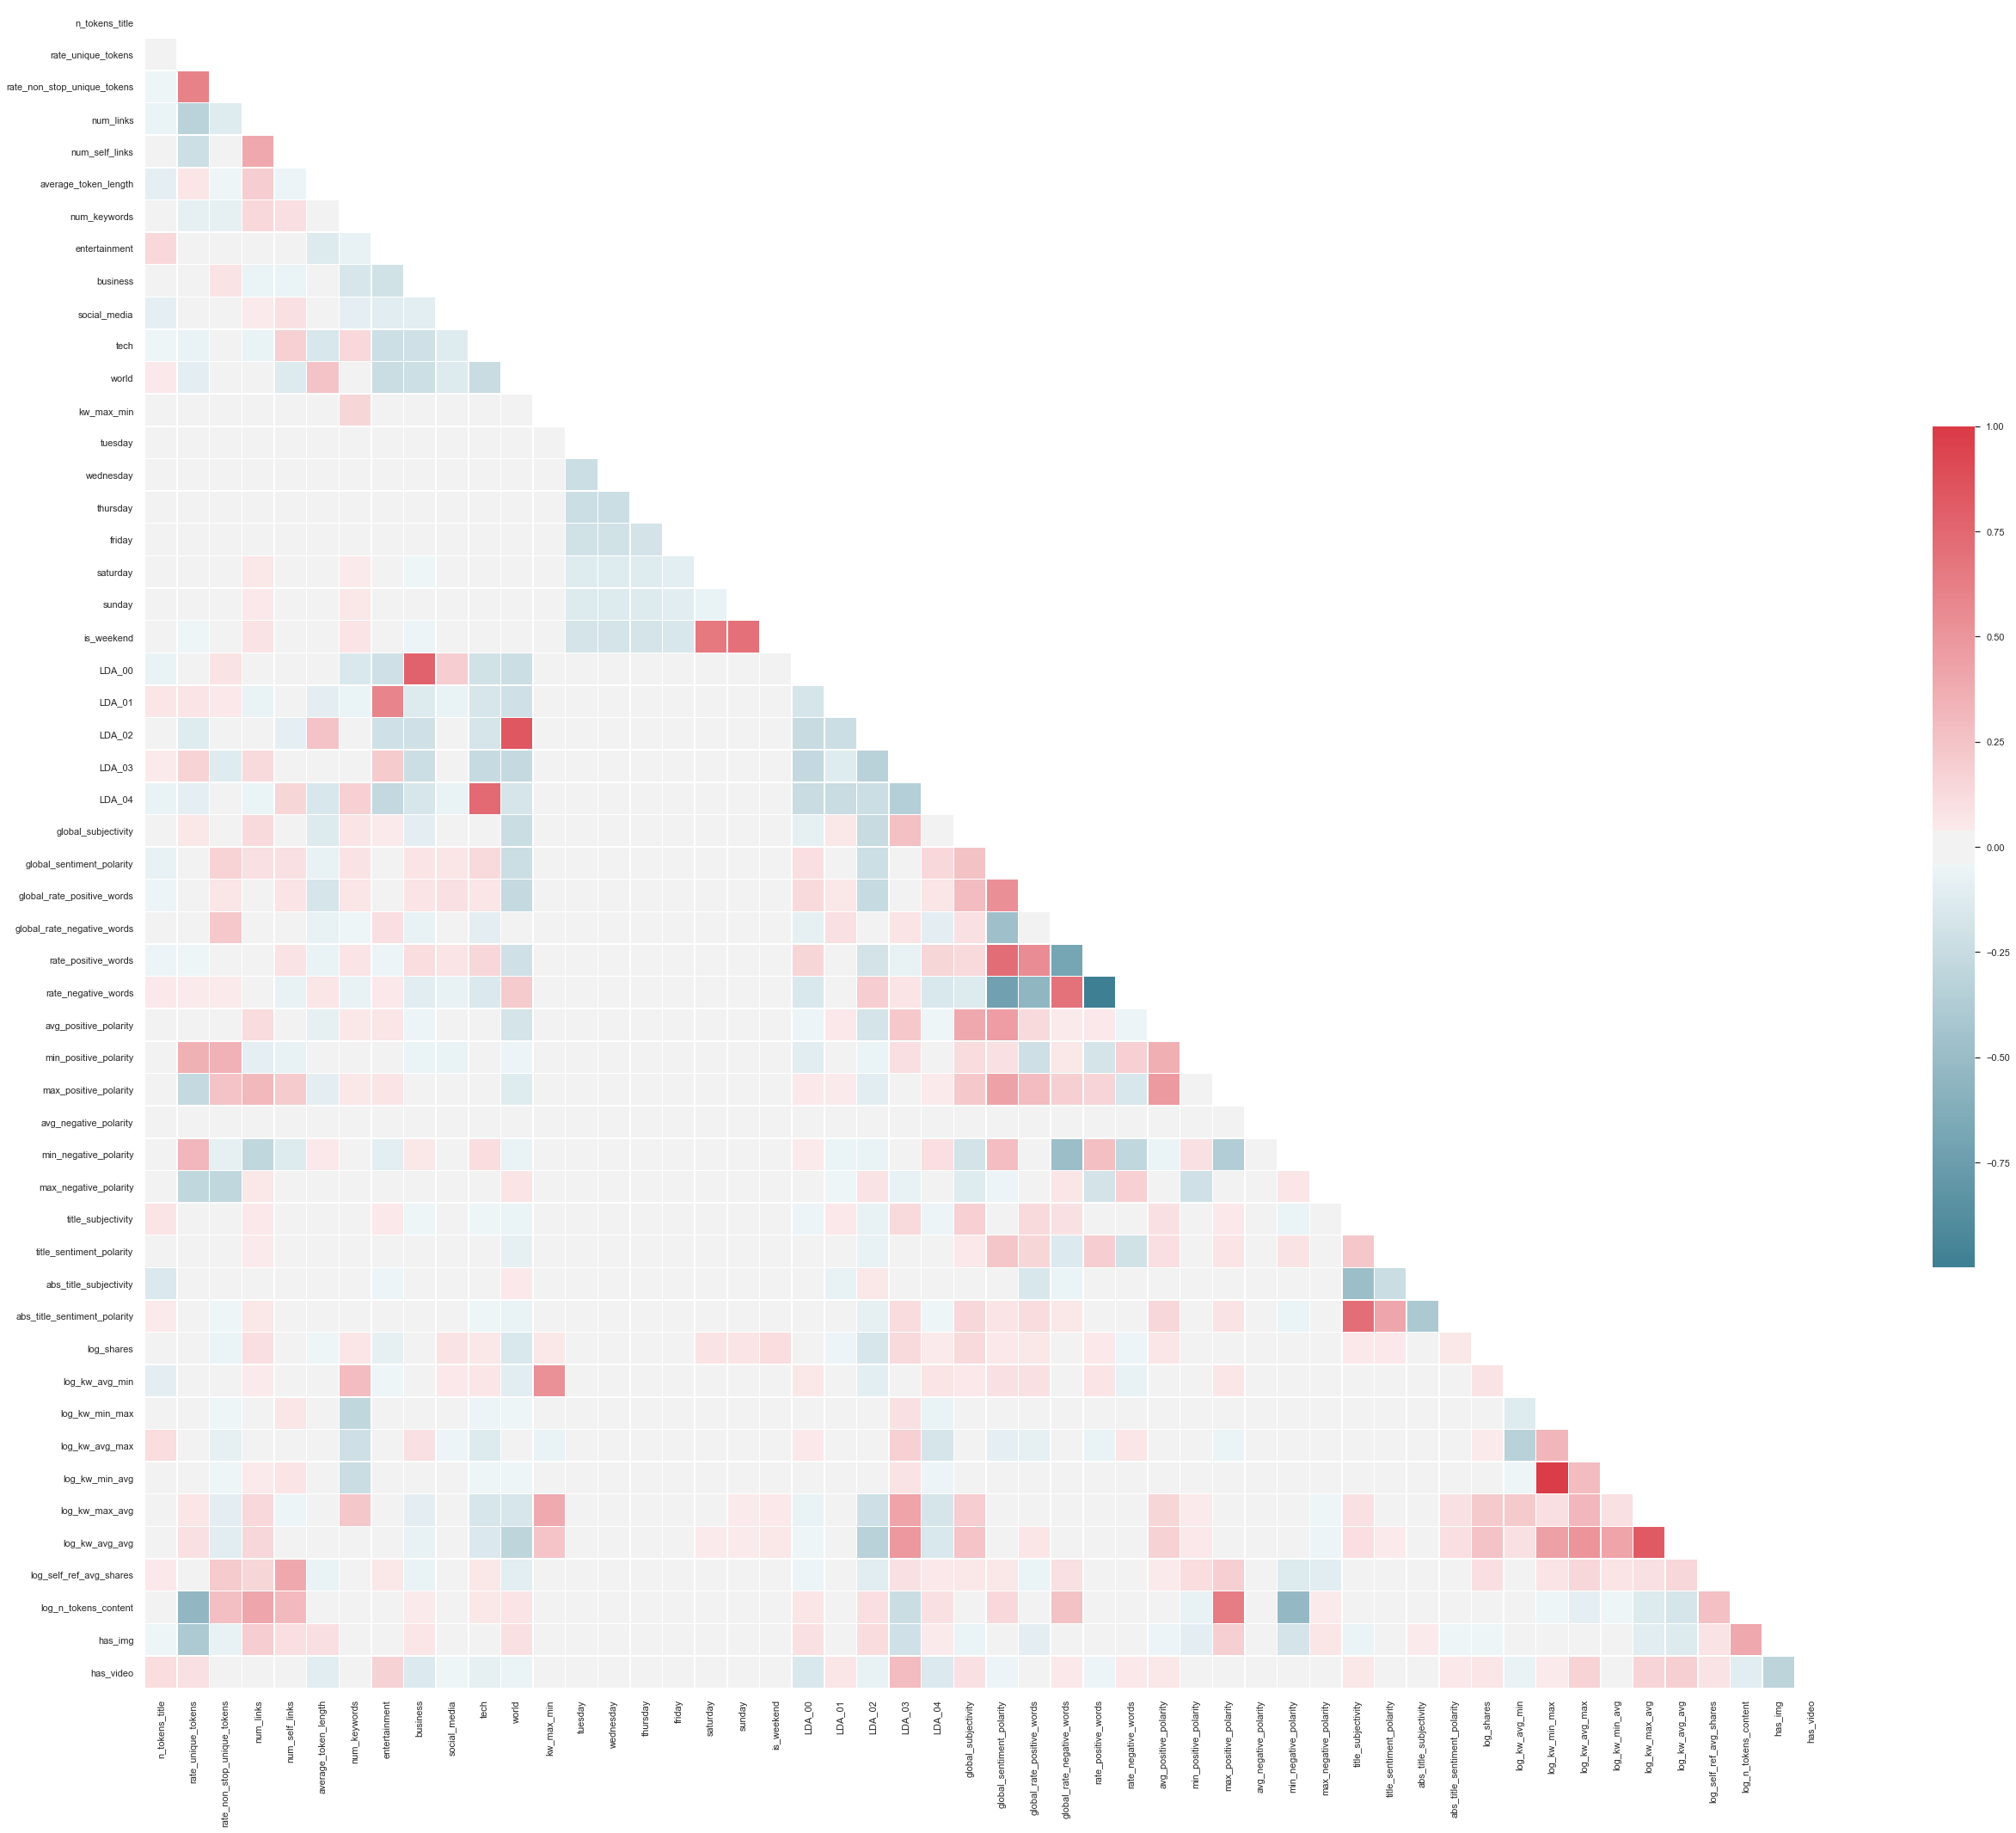

In [26]:
sns.set(style="white")

# Compute the correlation matrix
corr = features.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
features.drop(columns=['log_kw_min_max', 'kw_max_min'], inplace=True)

In [28]:
target = features['log_shares']
features_only = features.drop(columns='log_shares')
X_train, X_test, y_train, y_test = train_test_split(features_only, target, random_state=42, test_size=0.2)
# random_state=22,

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
regression = LinearRegression()

In [30]:
features.log_shares.describe()

count    39644.000000
mean         7.473784
std          0.922311
min          3.752911
25%          6.852243
50%          7.244228
75%          7.937375
max         11.196799
Name: log_shares, dtype: float64

In [31]:
features.columns

Index(['n_tokens_title', 'rate_unique_tokens', 'rate_non_stop_unique_tokens',
       'num_links', 'num_self_links', 'average_token_length', 'num_keywords',
       'entertainment', 'business', 'social_media', 'tech', 'world', 'tuesday',
       'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'log_shares', 'log_kw_avg_min',
       'log_kw_avg_max', 'log_kw_min_avg', 'log_kw_max_avg', 'log_kw_avg_avg',
       'log_self_ref_avg_shares', 'log_n_tokens_conte

In [32]:
continuous = ['n_tokens_title', 'rate_unique_tokens', 'rate_non_stop_unique_tokens',
               'num_links', 'num_self_links', 'average_token_length', 'num_keywords',
                'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
               'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
               'global_rate_positive_words', 'global_rate_negative_words',
               'rate_positive_words', 'avg_positive_polarity', 'min_positive_polarity',
               'max_positive_polarity', 'avg_negative_polarity',
               'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
               'title_sentiment_polarity', 'abs_title_subjectivity',
               'abs_title_sentiment_polarity', 'log_kw_avg_min',
               'log_kw_avg_max', 'log_kw_min_avg', 'log_kw_max_avg', 'log_kw_avg_avg',
               'log_self_ref_avg_shares', 'log_n_tokens_content', ]
categoricals = ['entertainment', 'business', 'social_media', 'tech', 'world',
                'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'is_weekend',
                'has_img', 'has_video']

target = y_train.copy()

features_cont = X_train[continuous]

# log features
log_names = [f'{column}_log' for column in features_cont.columns]

features_log = np.log(features_cont)
features_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_log_norm = features_log.apply(normalize)

features_cat = X_train[categoricals]

preprocessed = pd.concat([target, features_cont, features_cat], axis=1)

X = preprocessed.drop('log_shares', axis=1)
y = preprocessed['log_shares']

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

baseline

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


-2431468191943550.0

In [34]:
crossvalidation

KFold(n_splits=10, random_state=1, shuffle=True)

In [33]:
from itertools import combinations

interactions = []

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0
50
100
150
200
250


KeyboardInterrupt: 

In [ ]:
with open('train_interactions_list.pickle', 'wb') as f:
    pickle.dump(interactions, f)

In [ ]:
# with open('train_interactions_list.pickle', 'rb') as file:
#     interactions = pickle.load(file)

In [ ]:
len(interactions)

In [ ]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
max_r_squared = X.copy()

for i in interactions:
    max_r_squared[i[0]+'_'+i[1]] = max_r_squared[i[0]] * max_r_squared[i[1]]

max_r2_model = np.mean(cross_val_score(regression, max_r_squared, y, scoring='r2', cv=crossvalidation))

max_r2_model

In [ ]:
max_r2_target = pd.concat([target, max_r_squared], axis=1)

In [ ]:
f_list = list(max_r2_target.columns)
f_list.remove('log_shares')

col_list = '+'.join(f_list)
f = 'log_shares~' + col_list
model = ols(formula=f, data=max_r2_target).fit()
model.summary()

* R-squared value has gone from 0.127 to 0.183, or a 44.1% increase!
* Unfortunately the number of features is far more than the square root (178) of our sample size. Let's simplify and go for the top 100.

In [ ]:
np.sqrt(len(X_train))

In [ ]:
top_100 = sorted(interactions, key=lambda inter: inter[2], reverse=True)[:100]
top_100[-10:]

In [ ]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

for i in top_100:
    X_train[i[0]+'_'+i[1]] = X_train[i[0]] * X_train[i[1]]

final_model = np.mean(cross_val_score(regression, X_train, y, scoring='r2', cv=crossvalidation))

final_model

In [ ]:
final_target = pd.concat([target, X_train], axis=1)

In [ ]:
f_list = list(final_target.columns)
f_list.remove('log_shares')

col_list = '+'.join(f_list)
f = 'log_shares~' + col_list
model = ols(formula=f, data=final_target).fit()
model.summary()

In [ ]:
for i in top_100:
    X_test[i[0]+'_'+i[1]] = X_test[i[0]] * X_test[i[1]]

In [ ]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=f_list)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=f_list)

In [ ]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = np.exp(lm.predict(X_train))

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

y_pred = np.exp(lm.predict(X_test))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', train_rmse, "vs. Testing: ", test_rmse)

In [ ]:
sns.residplot(y_test, y_pred, lowess=True, color="g")

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=5)

selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [ ]:
selected_columns

In [ ]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = np.exp(lm_kbest.predict(X_train[selected_columns]))


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = np.exp(lm_kbest.predict(X_test[selected_columns]))

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse)

In [ ]:
sns.residplot(y_test, y_kbest, lowess=True, color="g")

In [ ]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred_lasso = np.exp(lasso.predict(X_train))
y_pred_lasso = np.exp(lasso.predict(X_test))

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred_lasso)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [ ]:
coefficient = lasso_coef01.T
coefficient[coefficient[0] != 0]

In [ ]:
sns.residplot( y_test, y_pred_lasso, lowess=True, color="g")

In [ ]:
X_train.corr() > .9

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df.plot.scatter('LDA_00', 'log_shares')

In [ ]:
df.shares.describe()

In [ ]:
df.hist('num_imgs', bins=20)

In [ ]:
df.num_imgs.describe()

In [ ]:
len(df[df['num_imgs'] == 0])

In [ ]:
df.plot.scatter('num_imgs', 'log_shares')

In [ ]:
df['one_img'] = np.where(df.num_imgs > 1, 1, 0)
df.boxplot('log_shares', 'one_img')

In [ ]:
df.num_videos.describe()

In [ ]:
df.plot.scatter('num_videos', 'log_shares')

In [ ]:
df.num_links.describe()

In [ ]:
df.plot.scatter('num_links', 'log_shares')

In [ ]:
df.num_self_links.describe()

In [ ]:
df.plot.scatter('num_self_links', 'log_shares')

In [ ]:
df.columns

In [ ]:
genre_cols = ['lifestyle', 'entertainment', 'business', 'social_media', 'tech', 'world']
day_cols = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

df_genres = df[genre_cols]
df_days = df[day_cols]
df_genres_01 = df[genre_cols]
df_days_01 = df[day_cols]

In [ ]:
for col in df_genres.columns:
    df_genres[col] = df_genres[col] * df['shares']

for col in df_days.columns:
    df_days[col] = df_days[col] * df['shares']

In [ ]:
df_genres_01.head()

In [ ]:
df_genres.head()

In [ ]:
df_days.head()

In [ ]:
# df_genres = df_genres.reindex(df_genres.mean().sort_values().index, axis=1)
df_genres = df_genres.reindex(df_genres_01.sum().sort_values().index, axis=1)
df_genres_01 = df_genres_01.reindex(df_genres_01.sum().sort_values().index, axis=1)

In [ ]:
df.boxplot('log_shares', 'lifestyle')

In [ ]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_genres.columns, df_genres.sum()/df_genres.astype(bool).sum(axis=0), color='salmon') 
plt.xticks(rotation='vertical')

plt.title('Average Popularity by Genre')
plt.ylabel('Average Shares')
plt.xlabel('Genre')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

In [ ]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_genres_01.columns, df_genres_01.sum(), color='salmon') 
plt.xticks(rotation='vertical')

plt.title('Genre Frequency')
plt.ylabel('# of Articles')
plt.xlabel('Genre')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

In [ ]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_days.columns, df_days.sum()/df_days.astype(bool).sum(axis=0), color='salmon') 
plt.xticks(rotation='vertical')

plt.title('Average Article Shares by Day Published')
plt.ylabel('Average Shares')
plt.xlabel('Day of Week')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

In [ ]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_days_01.columns, df_days_01.sum(), color='salmon', width=0.5) 
plt.xticks(rotation='vertical')

plt.title('Popularity of Publishing Day')
plt.ylabel('# of Articles')
plt.xlabel('Day of Week')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

In [ ]:
df.boxplot('log_shares', 'is_weekend')

In [ ]:
df['average_token_length'] = np.where(df.average_token_length == 0, df.average_token_length.mean(), df.average_token_length)
df.plot.scatter('average_token_length', 'log_shares')

In [ ]:
df.plot.scatter('n_tokens_title', 'shares')

In [ ]:
df.hist('n_tokens_title', bins=20)

In [ ]:
df.hist('average_token_length', bins=20)

In [ ]:
df.rate_unique_tokens.describe()

In [ ]:

df.plot.scatter('rate_unique_tokens', 'log_shares')

In [ ]:
df.hist('rate_unique_tokens')

In [ ]:
df['rate_unique_tokens'].corr(df['shares'])

In [ ]:
df.columns

In [ ]:
df['avg_positive_polarity'].corr(df['avg_negative_polarity'])

In [ ]:
df.columns

In [ ]:
df.plot.scatter('log_shares', 'timedelta')

In [ ]:
df['world_weekend'] = df['world'] * df['is_weekend']
df.boxplot('log_shares', 'world_weekend')

In [ ]:
df['world_weekend'].sum()

In [ ]:
df.drop(columns=['url', 'timedelta', 'shares', 'one_img', 'world_weekend'], inplace=True)
df.columns